## Gohou Ahoueneon
## gohouchristian35@gmail.com

In [122]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats 

# Import the course datasets 
grains = pd.read_csv('datasets/grains.csv')
fish = pd.read_csv('datasets/fish.csv',header=0)
wine = pd.read_csv('datasets/wine.csv')
eurovision = pd.read_csv('datasets/eurovision-2016.csv')
stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('datasets/lcd-digits.csv', header=None)

# Unsupervised Learning in Python

Run the hidden code cell below to import the data used in this course.

In [16]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats 

# Import the course datasets 
grains = pd.read_csv('datasets/grains.csv')
fish = pd.read_csv('datasets/fish.csv', header=None)
wine = pd.read_csv('datasets/wine.csv')
eurovision = pd.read_csv('datasets/eurovision-2016.csv')
stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('datasets/lcd-digits.csv', header=None)

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

## resolvons le premier probleme:

Vous travaillez pour un centre de recherche agronomique. Votre responsable souhaite que vous regroupiez les variétés de semences en fonction des différentes mesures contenues dans le grainsDataFrame. Ils veulent également savoir comment votre solution de clustering se compare aux types de graines répertoriés dans l'ensemble de données (les colonnes variety_numberet variety). Essayez d'utiliser toutes les techniques pertinentes que vous avez apprises dans l'apprentissage non supervisé en Python !

In [25]:
from sklearn.cluster import KMeans
liaison = KMeans(n_clusters=3)
grains1 = grains.drop("variety",axis=1)
liaison.fit(grains1)
groupe = liaison.predict(grains1)
print(groupe)

table = pd.DataFrame({'groupes':groupe,'especes':grains['variety']})
print(table) 

#on a crée trois clusters et on essaie de voir dans quel groupe se situe chaque observation

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     groupes         especes
0          2      Kama wheat
1          2      Kama wheat
2          2      Kama wheat
3          2      Kama wheat
4          2      Kama wheat
..       ...             ...
205        0  Canadian wheat
206        0  Canadian wheat
207        0  Canadian wheat
208        0  Canadian wheat
209        0  Canadian wheat

[210 rows x 2 columns]


In [27]:
tableau_croisé = pd.crosstab(table['groupes'],table['especes'])
print(tableau_croisé)

#comparaison de nos clusters avec les differentes variétes. Ce tableau croisé nous permet clairement de juger de la performance du model.

especes  Canadian wheat  Kama wheat  Rosa wheat
groupes                                        
0                    70           5           0
1                     0           1          60
2                     0          64          10


**Dans le cluster 0, la majorite de ses elements sont "Canadian wheat". 
Dans le cluster 1, les Rosa Wheat y sont quasiment tous, sauf 1 seul.
Dans le cluster 3, les Kama wheat y sont en majorité sauf 10 autres**

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- You work for an agricultural research center. Your manager wants you to group seed varieties based on different measurements contained in the `grains` DataFrame. They also want to know how your clustering solution compares to the seed types listed in the dataset (the `variety_number` and `variety` columns). Try to use all of the relevant techniques you learned in Unsupervised Learning in Python!
- In the `fish` DataFrame, each row represents an individual fish. Standardize the features and cluster the fish by their measurements. You can then compare your cluster labels with the actual fish species (first column).
- In the `wine` DataFrame, there are three `class_labels` in this dataset. Transform the features to get the most accurate clustering.
- In the `eurovision` DataFrame, perform hierarchical clustering of the voting countries using `complete` linkage and plot the resulting dendrogram.

## Resolvons le second probleme:

Dans le fishDataFrame, chaque ligne représente un poisson individuel. Standardisez les caractéristiques et regroupez les poissons en fonction de leurs mensurations. Vous pouvez ensuite comparer vos étiquettes de cluster avec les espèces de poissons réelles (première colonne).

In [37]:
fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [35]:
fish["Bream"].unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

In [40]:
#standardisation des caracteristiques
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

fish1 = fish.drop("Bream",axis = 1)
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4) 
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit_transform(fish1) 
cluster = pipeline.predict(fish1) 

table = pd.DataFrame({'clusters':cluster,'especes':fish["Bream"]})
print(table)

#une sorte de verification de la qualité de notre cluster 
tableau_croisé = pd.crosstab(table['clusters'],table['especes'])
print(tableau_croisé)



    clusters especes
0          1   Bream
1          1   Bream
2          1   Bream
3          1   Bream
4          1   Bream
..       ...     ...
79         3    Pike
80         3    Pike
81         3    Pike
82         3    Pike
83         3    Pike

[84 rows x 2 columns]
especes   Bream  Pike  Roach  Smelt
clusters                           
0             0     0     19      1
1            33     0      1      0
2             0     0      0     13
3             0    17      0      0


## Resolvons le probleme 3:

Dans le wineDataFrame, il y en a trois class_labelsdans cet ensemble de données. Transformez les fonctionnalités pour obtenir le clustering le plus précis.

In [41]:
wine.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
wine["class_name"].unique()

array(['Barolo', 'Grignolino', 'Barbera'], dtype=object)

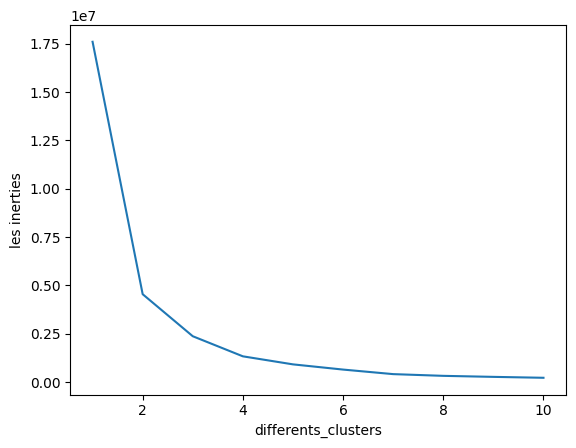

In [62]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

wine1 = wine.drop(["class_label","class_name"],axis=1)
liste2 = [i for i in range(1,11)]
liste = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(wine1)
    clusters = kmeans.predict(wine1)
    liste.append(kmeans.inertia_)
plt.plot(liste2,liste)
plt.xlabel("differents_clusters")
plt.ylabel("les inerties")
plt.show()   

**d'apres la regle du coude, le nombre de cluster approprié est bien 3. car à partir de ce nombre, l'inertie commence à baisser lentement**

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_transform(wine1)
cluster = kmeans.predict(wine1)

table = pd.DataFrame({'clusters':cluster,'class_label':wine["class_label"]})
print(table) 
tableau_croisé = pd.crosstab(table['clusters'],table['class_label']) 
print(tableau_croisé)

     clusters  class_label
0           0            1
1           0            1
2           0            1
3           0            1
4           2            1
..        ...          ...
173         2            3
174         2            3
175         2            3
176         2            3
177         1            3

[178 rows x 2 columns]
class_label   1   2   3
clusters               
0            46   1   0
1             0  50  19
2            13  20  29


### REMARQUE:
On a une classification avec le bon nombre de cluster mais qu'on ne juge pas assez bonne. Alors on va penser à Standardiser les données tout en maintenant le meme nombre de cluster. Ce qui peut ameliorer nos resultats.

In [71]:
kmeans = KMeans(n_clusters=3)
scaler = StandardScaler()
pipeline = make_pipeline(scaler,kmeans)

pipeline.fit_transform(wine1)
cluster = pipeline.predict(wine1)

table = pd.DataFrame({'clusters':cluster,'class_label':wine["class_label"]})
print(table) 
tableau_croisé = pd.crosstab(table['clusters'],table['class_label']) 
print(tableau_croisé)

     clusters  class_label
0           0            1
1           0            1
2           0            1
3           0            1
4           0            1
..        ...          ...
173         1            3
174         1            3
175         1            3
176         1            3
177         1            3

[178 rows x 2 columns]
class_label   1   2   3
clusters               
0            59   3   0
1             0   3  48
2             0  65   0


### On s'aperçoit qu'en standardisant les donnees, le resultats et plus meilleur.

## Reslvons le probleme 4:

Dans le eurovisionDataFrame, effectuez un regroupement hiérarchique des pays votants en utilisant completela liaison et tracez le dendrogramme résultant.

In [79]:
eurovision.head(20)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
6,Albania,Israel,10,2,18,4,12,8,17,3.0,NaN
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
8,Albania,Sweden,16,8,15,6,15,11,8,NaN,3.0
9,Albania,Germany,18,17,20,11,17,18,15,NaN,NaN


In [74]:
eurovision.isna().sum()

From country         0
To country           0
Jury A               0
Jury B               0
Jury C               0
Jury D               0
Jury E               0
Jury Rank            0
Televote Rank        0
Jury Points        646
Televote Points    646
dtype: int64

In [76]:
eurovision.shape

(1066, 11)

In [77]:
eurovision["Jury Points"].unique()

array([nan,  1.,  8.,  3.,  4., 10., 12.,  7.,  6.,  2.,  5.])

In [78]:
eurovision["Televote Points"].unique()

array([nan,  1., 10.,  8.,  3.,  5., 12.,  4.,  7.,  6.,  2.])

**Dans cette analyse, les colonnes Jury Point et Televote Points ont des valeurs manquantes qui font plus de la moitié dans l'ensemble de leur informations.
Aussi, nous pensons pouvoir faire une bonne classification sans ses deux colonnes vu que leurs informations ne sont pas assez pertinenentes. 
Alors nous optons pour la suppression de ces deux colonnes.**

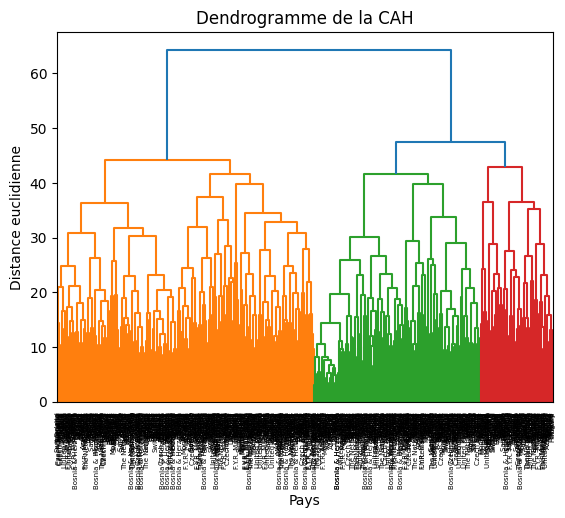

In [86]:
from scipy.cluster.hierarchy import dendrogram,linkage

eurovision1 = eurovision.drop(["Jury Points","Televote Points","From country","To country"],axis=1)
liaison = linkage(eurovision1, method='complete')
dendogramme = dendrogram(liaison, labels= list(eurovision["From country"]))
plt.xlabel('Pays')
plt.ylabel('Distance euclidienne')
plt.title('Dendrogramme de la CAH')
plt.show()

In [101]:
from scipy.cluster.hierarchy import fcluster #pour connaitre les differents cluster choisis
groupe = fcluster(liaison,47,criterion='distance') #4 pour dire la distance à la laquelle on decide de couper le dendrogramme
print(groupe)

[1 1 1 ... 2 1 1]


In [102]:
pairs = pd.DataFrame({'groupe':groupe,'Pays':list(eurovision["From country"])})
print(pairs.sort_values('groupe'))

     groupe     Pays
0         1  Albania
586       1   Israel
587       1   Israel
589       1   Israel
592       1   Israel
..      ...      ...
137       3  Belarus
795       3   Poland
133       3  Belarus
798       3   Poland
715       3  Moldova

[1066 rows x 2 columns]


**Ici, le coupant au niveau de 47 on obtient trois clusters dans lesquelles sont repartis les differents pays. En choissisant un autre decoupage,on aura une autre classification.Mais prefere la classification obtenue car il est preferabe le choisir au niveau la classification avant un grand saut**



## **effectuons le meme travail(probleme 4) cette fois ci en decidant de faire des imputations au niveau de nos colonnes vides**

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
imputation = SimpleImputer()

pipeline = make_pipeline(scaler,imputation)

eurovision1 = eurovision.drop(["From country","To country"],axis=1)
eurovision1=pipeline.fit_transform(eurovision1)  
eurovision1 = pd.DataFrame(eurovision1) #on obtient tableau numpy qu'on convertit en dataframe
eurovision1.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [124]:
eurovision1.head()

,0,1,2,3,4,5,6,7,8
0,0.928454,0.382696,1.474212,1.201333,1.474212,1.610651,0.109817,2.801991e-17,2.643388e-17
1,1.064893,0.246257,1.610651,1.337772,0.382696,1.201333,1.201333,2.801991e-17,2.643388e-17
2,1.201333,0.109817,1.337772,1.474212,1.064893,1.474212,1.474212,2.801991e-17,2.643388e-17
3,0.792014,-0.163062,-0.299501,1.064893,-0.299501,-0.026622,0.792014,2.801991e-17,2.643388e-17
4,-0.708820,-0.026622,-0.572380,0.109817,-0.572380,-0.435941,-0.435941,-1.436842e+00,-1.436842e+00


[[ 9.28453864e-01  3.82696037e-01  1.47421169e+00 ...  1.09817124e-01
   2.80199144e-17  2.64338815e-17]
 [ 1.06489332e+00  2.46256580e-01  1.61065115e+00 ...  1.20133278e+00
   2.80199144e-17  2.64338815e-17]
 [ 1.20133278e+00  1.09817124e-01  1.33777223e+00 ...  1.47421169e+00
   2.80199144e-17  2.64338815e-17]
 ...
 [-1.52745636e+00 -1.52745636e+00 -1.39101690e+00 ...  7.92014408e-01
   1.85592145e+00  2.64338815e-17]
 [ 1.33777223e+00  2.46256580e-01 -1.63061790e-01 ... -2.66223330e-02
   2.80199144e-17  2.64338815e-17]
 [ 2.46256580e-01  1.20133278e+00 -8.45259074e-01 ...  6.55574951e-01
   2.80199144e-17  2.64338815e-17]]


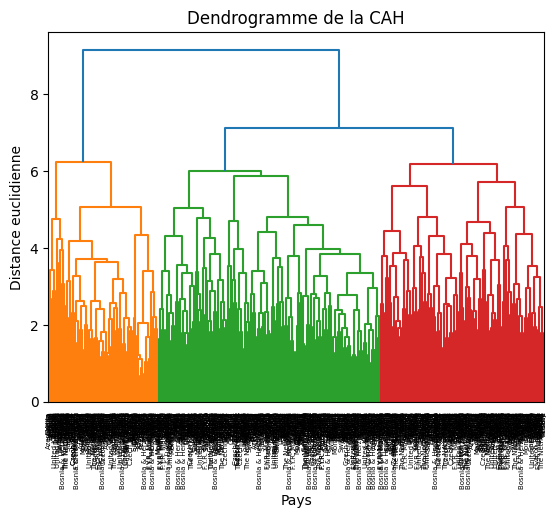

In [125]:
liaison = linkage(eurovision1, method='complete')
dendogramme = dendrogram(liaison, labels= list(eurovision["From country"]))
plt.xlabel('Pays')
plt.ylabel('Distance euclidienne')
plt.title('Dendrogramme de la CAH')
plt.show()

In [126]:
from scipy.cluster.hierarchy import fcluster #pour connaitre les differents cluster choisis
groupe = fcluster(liaison,6.5,criterion='distance') #4 pour dire la distance à la laquelle on decide de couper le dendrogramme
print(groupe)

[2 2 2 ... 1 2 2]


In [127]:
pairs = pd.DataFrame({'groupe':groupe,'Pays':list(eurovision["From country"])})
print(pairs.sort_values('groupe'))

#connaitre la repartions des clusters.

     groupe                  Pays
494       1                Greece
187       1  Bosnia & Herzegovina
189       1  Bosnia & Herzegovina
603       1                Israel
191       1  Bosnia & Herzegovina
..      ...                   ...
292       3        Czech Republic
295       3        Czech Republic
296       3        Czech Republic
712       3               Moldova
532       3               Hungary

[1066 rows x 2 columns]


## **Dans les deux cas, on a trois groupe, mais les repartitions sont differentes à chaque fois. On ne peut pas conclure grande chose mais on s'apercoit clairement que le fait de centrer reduire et imputer les données à un impcat.**